In [51]:
#%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
#%pip install tqdm
#%pip install scipy
#%pip install scikit-learn

In [103]:
import os
from tqdm import tqdm

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [66]:
def load_images_from_folder(folder, image_size=(150, 150)):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        if os.path.isdir(label_path):
            for filename in os.listdir(label_path):
                img_path = os.path.join(label_path, filename)
                img = Image.open(img_path)
                img = img.resize(image_size)
                img = np.array(img)
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

data = 'Dataset/'


X, y = load_images_from_folder(data, image_size=(150, 150))

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)


In [ ]:
''' Old code used to split and normalize datas
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.3 )



train_generator = train_datagen.flow_from_directory(
    data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  
    subset='training'  
)

validation_generator = train_datagen.flow_from_directory(
    data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  
)
'''



Found 680 images belonging to 10 classes.
Found 287 images belonging to 10 classes.


In [69]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(773, 150, 150, 3) (194, 150, 150, 3) (773, 10) (194, 10)


In [72]:
print(label_encoder.classes_)

['Beagle' 'Boxer' 'Bulldog' 'Dachshund' 'German_Shepherd'
 'Golden_Retriever' 'Labrador_Retriever' 'Poodle' 'Rottweiler'
 'Yorkshire_Terrier']


In [77]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

c:\Users\Manuel\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,642 (18.42 MB)

 Trainable params: 4,829,642 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
history = model.fit(X_train,y_train,
    epochs=30,
    validation_data=(X_val, y_val))

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 226ms/step - accuracy: 0.1133 - loss: 79.5784 - val_accuracy: 0.4639 - val_loss: 1.8464
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - accuracy: 0.4811 - loss: 1.5367 - val_accuracy: 0.7577 - val_loss: 0.9224
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - accuracy: 0.7825 - loss: 0.7058 - val_accuracy: 0.8969 - val_loss: 0.3536
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - accuracy: 0.8771 - loss: 0.4063 - val_accuracy: 0.9691 - val_loss: 0.1418
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.9350 - loss: 0.2838 - val_accuracy: 0.9897 - val_loss: 0.0718
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 220ms/step - accuracy: 0.9423 - loss: 0.2523 - val_accuracy: 0.9948 - val_loss: 0.0324
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 222ms/step - accuracy: 0.9690 - loss: 0.1330 - val_accuracy: 0.9897 - val_loss: 0.0550
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - accuracy: 0.9601 - loss: 0.1282 - val_accuracy: 0

In [82]:
model.save('NN_Dog_Breed_Classifier.h5')
model.save('NN_Dog_Bree_Classifier.keras')

In [84]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {val_accuracy:.4f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9944 - loss: 0.0438 
Validation accuracy: 0.9897


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
['Beagle']


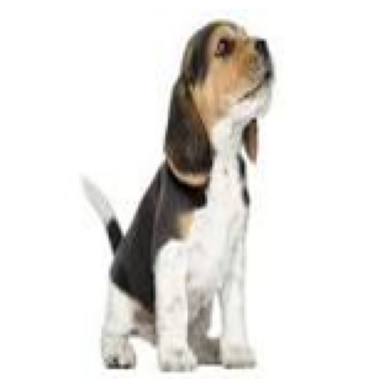

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
['Golden_Retriever']


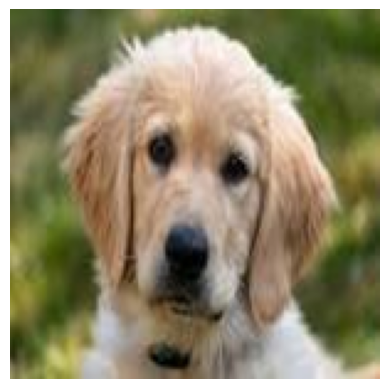

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
['Beagle']


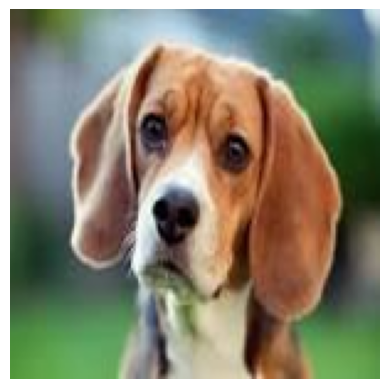

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
['Beagle']


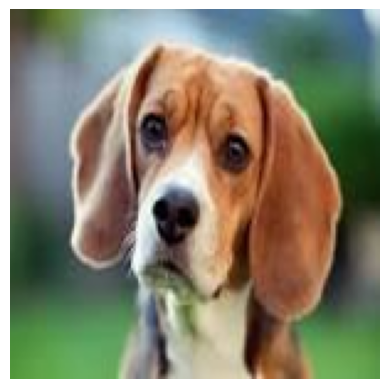

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
['Labrador_Retriever']


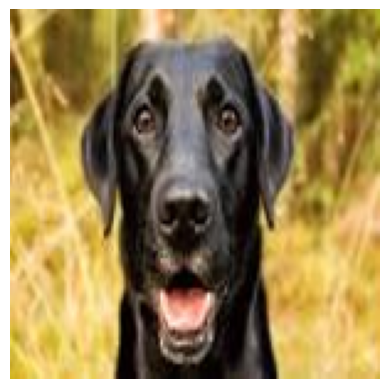

In [111]:
for x in range(0,5):
    i = random.randint(0,10)
    y_pred = model.predict(X_val[i].reshape(1,150,150,3))
    predicted_class = label_encoder.inverse_transform([np.argmax(y_pred)])
    print(predicted_class)
    plt.imshow(X_val[i])
    plt.axis('off') 
    plt.show()